In [122]:
import torch
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

In [123]:
values = np.loadtxt('vl5_data.csv')
t_u = torch.tensor(values[:,1])
t_c = torch.tensor(values[:,0])

In [124]:
def model(t_u, w, b):
    return w*t_u+b

def loss_fn(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

In [125]:
def model_quad(t_u, w1,w2, b):
    return w2*(t_u**2)+w1*t_u+b

def loss_fn_quad(t_p, t_c):
    sq_diff = (t_p - t_c)**2
    return sq_diff.mean()

In [126]:
n_samples = t_u.shape[0]
n_val = int(0.5 * n_samples)
print(f'gesamtanzahl = {n_samples}, validierungsanzahl = {n_val}')

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices)
print(val_indices)

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

gesamtanzahl = 11, validierungsanzahl = 5
tensor([8, 0, 3, 9, 4, 6])
tensor([ 7, 10,  5,  2,  1])


In [127]:
t_un = 0.1 * t_u

In [128]:
def training_loop(n_epochs, optimizer, train_t_u, train_t_c, val_t_u, val_t_c):
    loss_simple = np.zeros(n_epochs)
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        loss = loss_fn(train_t_p, train_t_c)
        # with torch.no_grad():
        #     params -= learning_rate * params.grad
        loss_simple[epoch-1] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0 or epoch == 1:
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            print('Epoch %d, Loss %f, val-Loss %f' % (epoch, float(loss), float(val_loss)))
    return params, loss_simple

In [129]:
def training_loop_quad(n_epochs, optimizer, train_t_u, train_t_c, val_t_u, val_t_c):
    loss_quad = np.zeros(n_epochs)
    for epoch in range(1, n_epochs + 1):
        train_t_p = model_quad(train_t_u, *params_quad)
        loss = loss_fn(train_t_p, train_t_c)
        # with torch.no_grad():
        #     params -= learning_rate * params.grad
        loss_quad[epoch-1] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0 or epoch == 1:
            val_t_p = model_quad(val_t_u, *params_quad)
            val_loss = loss_fn(val_t_p, val_t_c)
            print('Epoch %d, Loss %f, val-Loss %f' % (epoch, float(loss), float(val_loss)))
    return params_quad, loss_quad

Epoch 1, Loss 80.106200, val-Loss 36.060540
Epoch 500, Loss 8.912108, val-Loss 5.697005
Epoch 1000, Loss 4.336701, val-Loss 3.229528
Epoch 1500, Loss 3.487997, val-Loss 3.315420
Epoch 2000, Loss 3.330573, val-Loss 3.565467
Epoch 2500, Loss 3.301370, val-Loss 3.712679
Epoch 3000, Loss 3.295953, val-Loss 3.783407
Epoch 3500, Loss 3.294948, val-Loss 3.815231
Epoch 4000, Loss 3.294762, val-Loss 3.829194
Epoch 4500, Loss 3.294727, val-Loss 3.835241
Epoch 5000, Loss 3.294721, val-Loss 3.837870


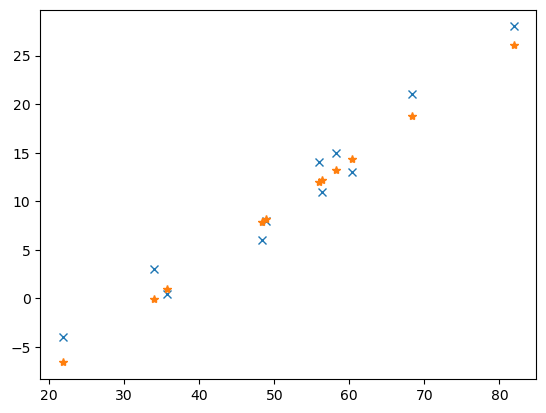

In [130]:
learning_rate = 1e-2

params = torch.tensor([1.0, 0.0], requires_grad=True)
params_quad = torch.tensor([1.0,1.0,0.0])

optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()

# params = torch.tensor([1.0, 0.0], requires_grad=True)
params, loss_simple = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    train_t_u = train_t_un, 
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)
plt.plot(t_u,t_c,'x')
t_p = model(t_un, params[0], params[1])
plt.plot(t_u.detach().numpy(),t_p.detach().numpy(),'*')
plt.show()

Epoch 1, Loss 186.541667, val-Loss 178.564678
Epoch 500, Loss 1.870338, val-Loss 8.731312
Epoch 1000, Loss 0.902543, val-Loss 8.188966
Epoch 1500, Loss 0.890787, val-Loss 8.213325
Epoch 2000, Loss 0.889510, val-Loss 8.251146
Epoch 2500, Loss 0.887941, val-Loss 8.299948
Epoch 3000, Loss 0.886074, val-Loss 8.361343
Epoch 3500, Loss 0.883939, val-Loss 8.436786
Epoch 4000, Loss 0.881604, val-Loss 8.527398
Epoch 4500, Loss 0.879178, val-Loss 8.633347
Epoch 5000, Loss 0.876816, val-Loss 8.753389


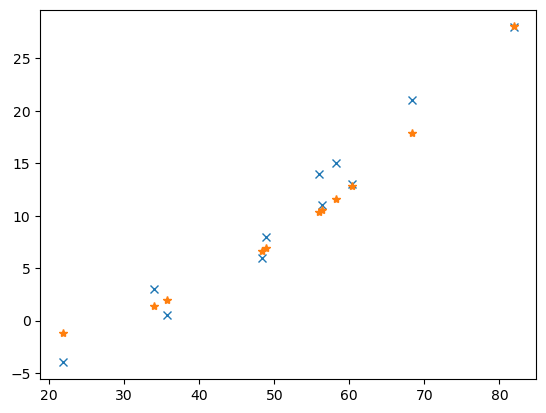

In [131]:
learning_rate = 1e-2

params_quad = torch.tensor([0.0,0.0,0.0], requires_grad=True)

optimizer = optim.Adam([params_quad], lr=learning_rate)

t_p = model_quad(t_u, *params_quad)
loss = loss_fn_quad(t_p, t_c)
optimizer.zero_grad()
loss.backward()

# params = torch.tensor([1.0, 0.0], requires_grad=True)
params_quad, loss_quad = training_loop_quad(
    n_epochs = 5000, 
    optimizer = optimizer,
    train_t_u = train_t_un, 
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)
plt.plot(t_u,t_c,'x')
t_p = model_quad(t_un, params_quad[0], params_quad[1],params_quad[2])
plt.plot(t_u.detach().numpy(),t_p.detach().numpy(),'*')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

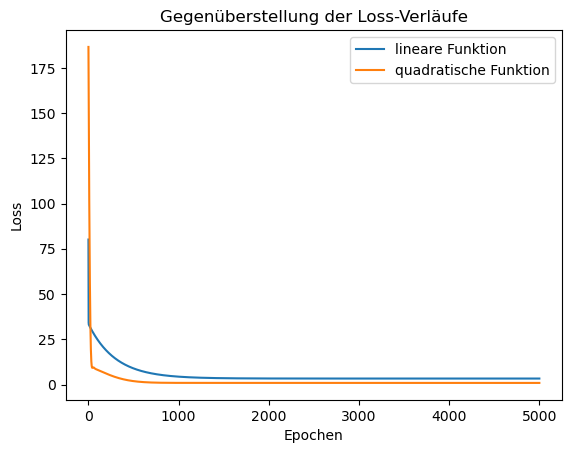

In [136]:
# plot the values of loss: 

epochs = np.arange(1, 5001, 1)

plt.plot(epochs, loss_simple,label = 'lineare Funktion')
plt.plot(epochs, loss_quad,label = 'quadratische Funktion')
plt.xlabel("Epochen")
plt.ylabel("Loss")
plt.title("Gegenüberstellung der Loss-Verläufe")
plt.legend()
plt.show

Antworten auf die Fragen:

1.: Der Loss ist mit dem neuen Modell kleiner geworden, allerdings nicht signifikant. Das angepasste Modell pendelt sich allerdings schneller auf dem Niveau ein.

2.: Meiner Meinung nach sieht das Ergebnis mit der linearen Funktion besser aus.